In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]
#Эта строка устанавливает размер по умолчанию для всех создаваемых фигур (графиков или изображений) в Matplotlib.
#rcParams - это словарь, содержащий настройки по умолчанию для Matplotlib.
#'figure.figsize' - это ключ, отвечающий за размер фигуры.
#[9, 6] устанавливает ширину в 9 дюймов и высоту в 6 дюймов для всех новых фигур.

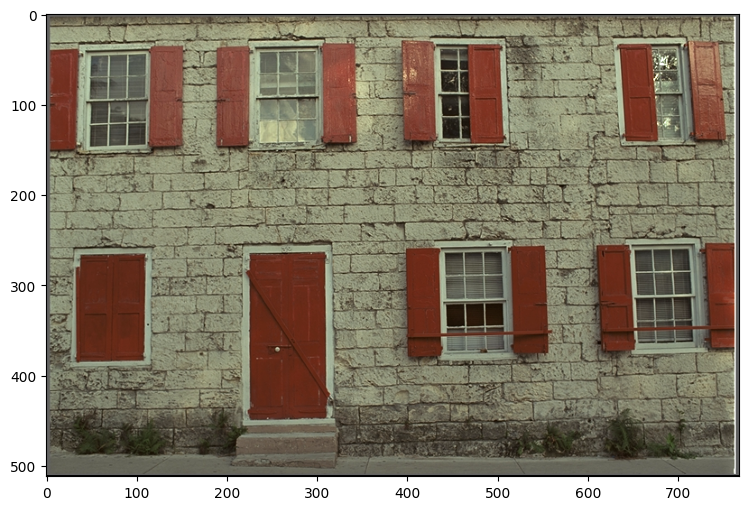

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2.cvtColor() - это функция OpenCV для преобразования изображения из одного цветового пространства в другое.
#cv2.COLOR_BGR2RGB - это флаг, указывающий тип преобразования: из BGR (Blue, Green, Red) в RGB (Red, Green, Blue).
#OpenCV по умолчанию загружает изображения в формате BGR, в то время как большинство других библиотек (включая Matplotlib) ожидают изображения в формате RGB. 
plt.imshow(img)

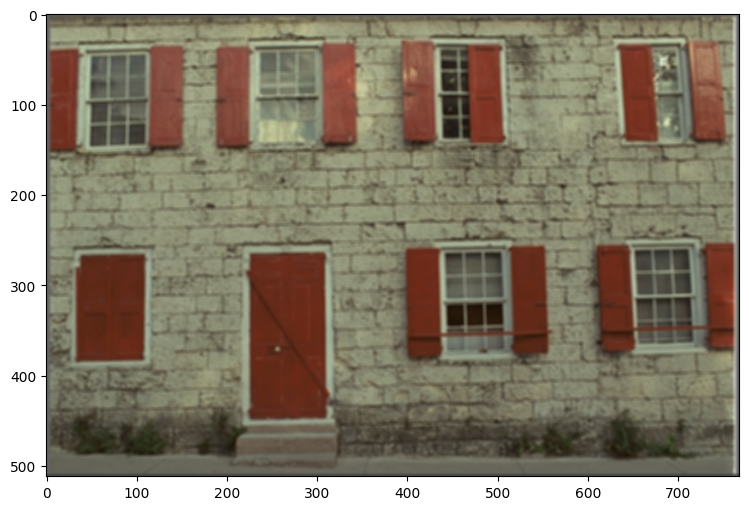

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (5, 5), 2.0)
plt.imshow(unsharp)

In [6]:
diff = img.astype(np.float32) - unsharp.astype(np.float32)
#строка вычисляет разницу между оригинальным изображением и его размытой версией

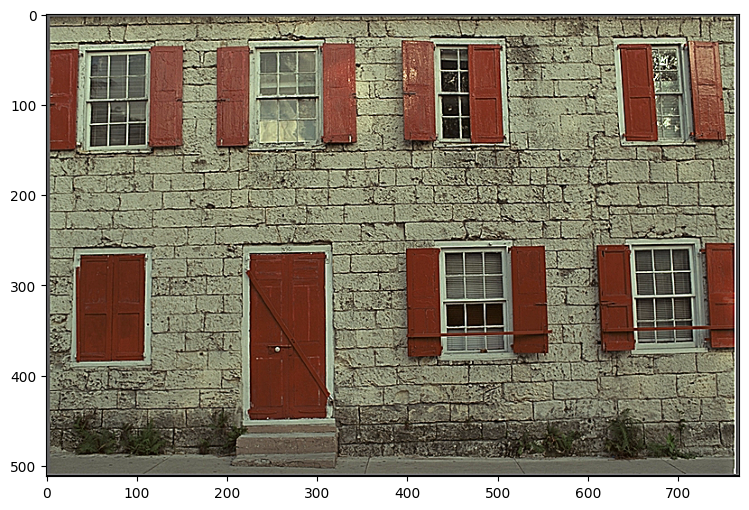

In [7]:
amount = 1.5
#определяет силу применения фильтра.
sharpened = img.astype(np.float32) + diff * amount
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
plt.imshow(sharpened)

In [ ]:
'''Questions
What is a good (reasonable) value for the amount parameter?
    Обычно разумные значения находятся в диапазоне от 0.5 до 2.0.
    Значение около 1.0 часто дает заметное, но не чрезмерное усиление резкости.
    Точное "хорошее" значение зависит от конкретного изображения и желаемого результата.

What happens if it is too small?
    Эффект усиления резкости будет слабым или почти незаметным.
    Детали и края будут лишь слегка подчеркнуты.

What happens if it is too large?
    Изображение может выглядеть неестественно резким.
    Могут появиться артефакты, особенно вокруг краев объектов.
    Усилится шум на изображении.
    В экстремальных случаях это может привести к появлению ореолов вокруг контрастных краев.
    Возможно появление эффекта "пересвечивания" на ярких участках и потеря деталей в тенях.
Рекомендации:
Начните с умеренного значения (например, 1.0) и постепенно корректируйте его.
Учитывайте содержание изображения: для фотографий с мелкими деталями может подойти меньшее значение, чем для изображений с крупными объектами.
Всегда проверяйте результат визуально, обращая внимание на естественность изображения и отсутствие артефактов.
'''